# 데이터 조사 시점: 2020/01/01 ~ 2020/12/31

# 조사기관 : 도로교통공단

# 데이터 다운로드 : https://www.data.go.kr/data/15070340/fileData.do


# 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

# 구글 드라이브 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 폰트 설정

## colab용 폰트 설정

In [3]:
!sudo apt-get install -y fonts-nanum 

!sudo fc-cache -fv 

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
plt.rc("font", family="NanumBarungothic")
plt.rc("axes", unicode_minus=False)

## jupyter notebook용 폰트 설정

In [5]:
# plt.rc("font", family="Malgun gothic")
# plt.rc("axes", unicode_minus=False)

In [6]:
# plt.title("한글폰트설정")
# plt.plot([-4, -6, 1, 2, 0, 3])

# 데이터 분석

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/도로교통공단_사망 교통사고 정보_20201231.csv", encoding="cp949")

In [8]:
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933
3,2020,2020-01-01 10,주,수,1,0,0,0,0,경남,거창군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,1038413.0,1748968.0,127.924796,35.736290
4,2020,2020-01-01 11,주,수,1,0,0,0,0,경기,이천시,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,농기계,없음,1011197.0,1900537.0,127.626014,37.103415


In [9]:
df.tail()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
2978,2020,2020-12-31 11,주,목,1,0,0,0,0,경기,용인시,차대차,기타,기타,신호위반,교차로,교차로내,이륜차,건설기계,981838.0,1906164.0,127.295465,37.154028
2979,2020,2020-12-31 18,야,목,1,0,0,0,0,세종,세종시,차대차,추돌,추돌,신호위반,교차로,교차로내,자전거,승용차,977621.0,1833850.0,127.250103,36.502055
2980,2020,2020-12-31 19,야,목,1,1,0,1,0,경남,창원시(통합),차대차,기타,기타,과속,교차로,교차로내,특수차,승용차,1104290.0,1697744.0,128.646633,35.269736
2981,2020,2020-12-31 21,야,목,1,0,0,0,0,경기,안산시,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로내,승용차,보행자,939897.0,1928242.0,126.821373,37.351270
2982,2020,2020-12-31 21,야,목,1,0,0,0,0,경기,남양주시,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,이륜차,승용차,969824.0,1957478.0,127.158074,37.616246


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         2983 non-null   int64  
 1   발생년월일시      2983 non-null   object 
 2   주야          2983 non-null   object 
 3   요일          2983 non-null   object 
 4   사망자수        2983 non-null   int64  
 5   부상자수        2983 non-null   int64  
 6   중상자수        2983 non-null   int64  
 7   경상자수        2983 non-null   int64  
 8   부상신고자수      2983 non-null   int64  
 9   발생지시도       2983 non-null   object 
 10  발생지시군구      2983 non-null   object 
 11  사고유형_대분류    2983 non-null   object 
 12  사고유형_중분류    2983 non-null   object 
 13  사고유형        2983 non-null   object 
 14  가해자법규위반     2983 non-null   object 
 15  도로형태_대분류    2983 non-null   object 
 16  도로형태        2983 non-null   object 
 17  가해자_당사자종별   2983 non-null   object 
 18  피해자_당사자종별   2983 non-null   object 
 19  발생위치X_UTMK  2983 non-null  

In [11]:
df.isnull().sum()

#결측치 X

발생년           0
발생년월일시        0
주야            0
요일            0
사망자수          0
부상자수          0
중상자수          0
경상자수          0
부상신고자수        0
발생지시도         0
발생지시군구        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
도로형태_대분류      0
도로형태          0
가해자_당사자종별     0
피해자_당사자종별     0
발생위치X_UTMK    0
발생위치Y_UTMK    0
경도            0
위도            0
dtype: int64

In [12]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [13]:
columns = ["발생년월일시", "주야", "요일", "사망자수", "부상자수",
            "중상자수", "경상자수", "발생지시도", "발생지시군구",
           "사고유형_대분류", "사고유형", "가해자법규위반",
           "가해자_당사자종별", "피해자_당사자종별", "경도", "위도"]
df = df[columns].copy()

In [14]:
df.head()

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
0,2020-01-01 05,야,수,1,0,0,0,서울,강남구,차대사람,차도통행중,안전운전 의무 불이행,승용차,보행자,127.046727,37.486761
1,2020-01-01 05,야,수,1,0,0,0,경기,화성시,차대차,추돌,안전운전 의무 불이행,승용차,화물차,126.950147,37.250560
2,2020-01-01 07,주,수,1,0,0,0,충남,천안시,차대사람,횡단중,안전운전 의무 불이행,승용차,보행자,127.137666,36.826933
3,2020-01-01 10,주,수,1,0,0,0,경남,거창군,차량단독,공작물충돌,안전운전 의무 불이행,화물차,없음,127.924796,35.736290
4,2020-01-01 11,주,수,1,0,0,0,경기,이천시,차량단독,도로이탈 추락,안전운전 의무 불이행,농기계,없음,127.626014,37.103415


In [15]:
df.tail()

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
2978,2020-12-31 11,주,목,1,0,0,0,경기,용인시,차대차,기타,신호위반,이륜차,건설기계,127.295465,37.154028
2979,2020-12-31 18,야,목,1,0,0,0,세종,세종시,차대차,추돌,신호위반,자전거,승용차,127.250103,36.502055
2980,2020-12-31 19,야,목,1,1,0,1,경남,창원시(통합),차대차,기타,과속,특수차,승용차,128.646633,35.269736
2981,2020-12-31 21,야,목,1,0,0,0,경기,안산시,차대사람,횡단중,안전운전 의무 불이행,승용차,보행자,126.821373,37.351270
2982,2020-12-31 21,야,목,1,0,0,0,경기,남양주시,차대차,측면충돌,신호위반,이륜차,승용차,127.158074,37.616246


# 데이터 시각화

In [16]:
colors = sns.color_palette("Pastel2")
colors2 = sns.color_palette("tab20c")

#컬러 설정

## 교통사고 피해별 그래프

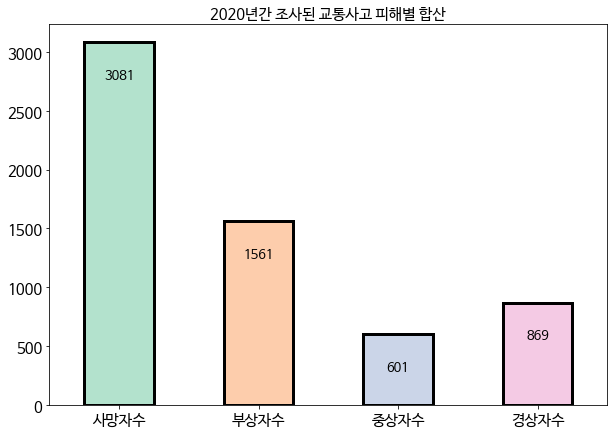

In [17]:
df_injury = df[["사망자수", "부상자수", "중상자수", "경상자수"]]

ax = df_injury.sum().plot.bar(rot=0, color=colors, figsize=(10, 7),
                         fontsize=15, edgecolor='black', linewidth=3)
plt.title("2020년간 조사된 교통사고 피해별 합산", fontsize=15)
#그래프 위에 숫자 표시
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=13, color='black', xytext=(0, -30), 
       textcoords='offset points')

plt.show()

## 낮과 밤중 일어난 교통사고 비율 그래프

Text(0.5, 1.0, '주야중 교통사고가 일어난 비율')

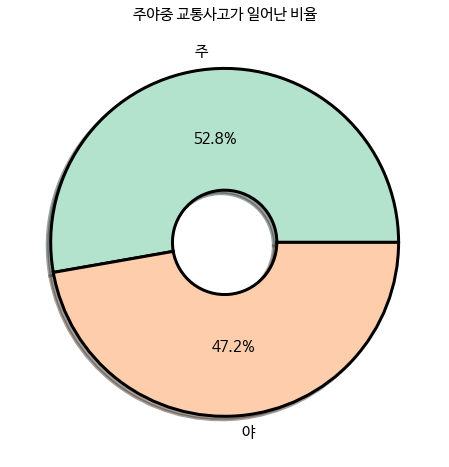

In [18]:
wedgeprops={'width': 0.7, 'edgecolor': "black", 'linewidth': 3}

df["주야"].value_counts().plot(kind="pie", autopct="%1.1f%%",
                     fontsize=15, shadow=True, colors=colors,
                     wedgeprops=wedgeprops, ylabel='', figsize=(8, 8))

plt.title("주야중 교통사고가 일어난 비율", fontsize=15)

#낮에 일어난 사고가 더 많음.

## 요일별 사고 횟수 그래프

In [19]:
df_days = df[["요일", "사망자수", "부상자수", "중상자수", "경상자수"]]

df_days = df_days.groupby("요일").sum()

df_days

,사망자수,부상자수,중상자수,경상자수
요일,,,,
금,467,202,83,105
목,426,187,73,102
수,492,299,111,166
월,457,235,75,148
일,387,185,89,88
토,409,266,88,163
화,443,187,82,97


In [20]:
df_days = df[["요일", "사망자수", "부상자수", "중상자수", "경상자수"]]

df_days = df_days.groupby("요일").sum()
df_days2 = df_days.sum(axis=1)

weeks = ["일", "토", "금", "목", "수", "화", "월"]
weeks2 = ["월", "화", "수", "목", "금", "토", "일"]

df_days = df_days.reindex(weeks)
df_days2 = df_days2.reindex(weeks2)

df_days

#그래프에서 요일순으로 볼 수 있게 정렬

,사망자수,부상자수,중상자수,경상자수
요일,,,,
일,387,185,89,88
토,409,266,88,163
금,467,202,83,105
목,426,187,73,102
수,492,299,111,166
화,443,187,82,97
월,457,235,75,148


Text(0.5, 1.0, '요일별 사고 횟수')

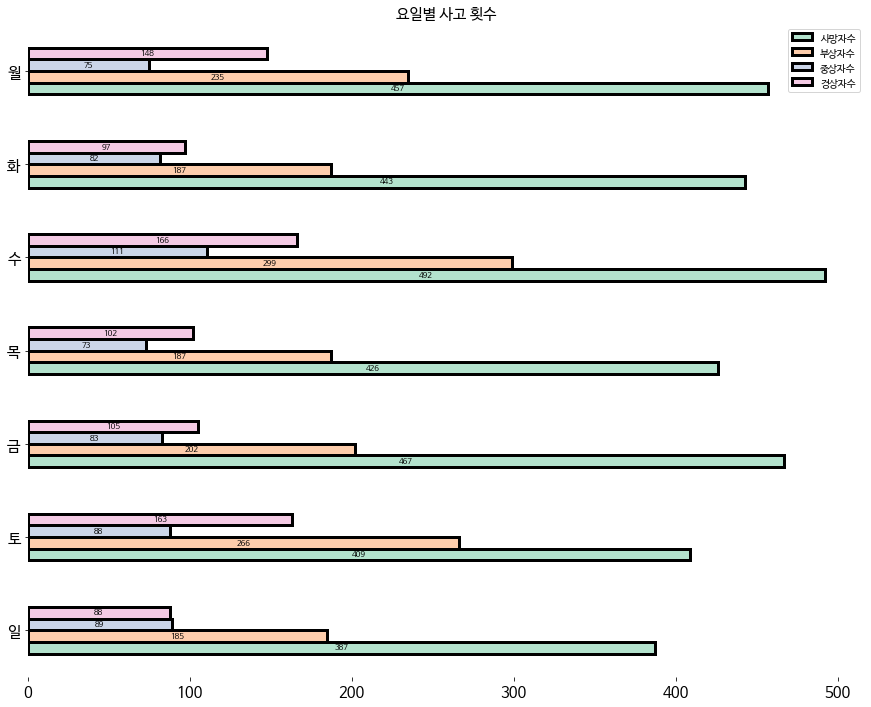

In [21]:
ax = df_days.plot.barh(rot=0, figsize=(15, 12), color=colors, fontsize=15,
                                edgecolor="black", linewidth=3, xlabel="")
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=8)

plt.box(False)
plt.title("요일별 사고 횟수", fontsize=15)   

#사망자수, 부상자수, 중상자수, 경상자수 모두 수요일에서 가장 많은 수치를 보여줌

Text(0.5, 1.0, '요일별 사고 횟수')

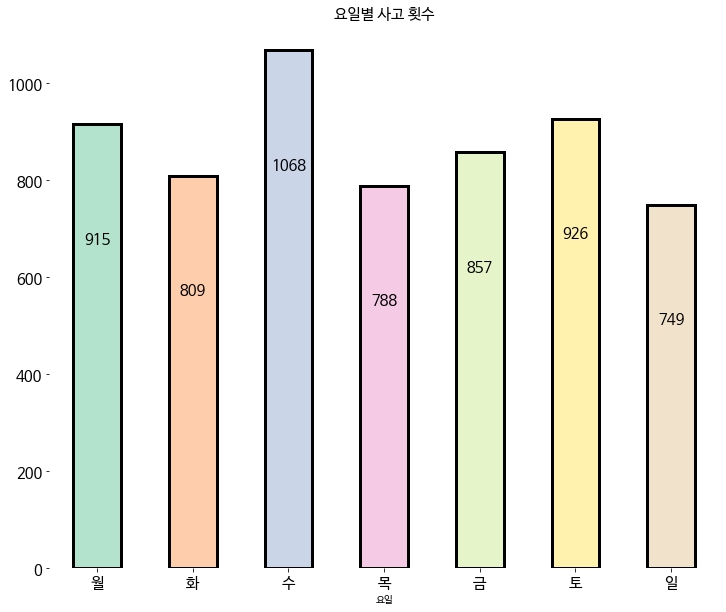

In [22]:
ax = df_days2.plot.bar(rot=0, figsize=(12, 10), color=colors, fontsize=15,
                                edgecolor="black", linewidth=3)
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, -100), 
       textcoords='offset points')

plt.box(False)
plt.title("요일별 사고 횟수", fontsize=15)   

#요일별로 일어난 사망자수, 부상자수, 중상자수, 경상자수를 모두 합친 그래프

#수요일에 일어난 사고 횟수가 가장 많음

## 사고 유형 그래프

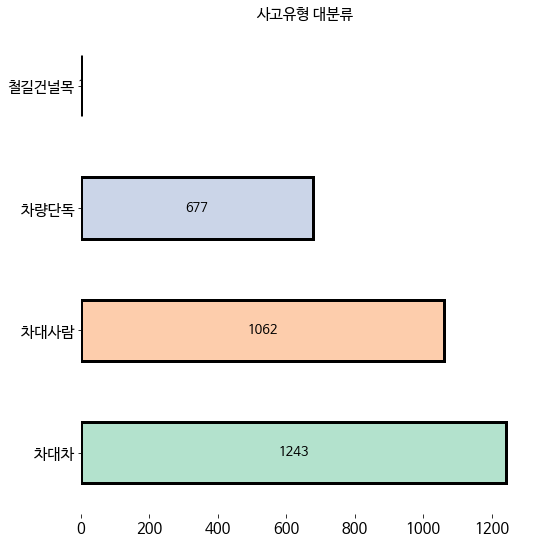

In [23]:
ax = df["사고유형_대분류"].value_counts().plot.barh(figsize=(8, 9), color=colors, fontsize=15, 
                                        edgecolor="black", linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("사고유형 대분류", fontsize=15)
plt.show()

#차대차, 차대사람, 차량단독(추락, 장애물충돌 등등) 이 가장 많음.

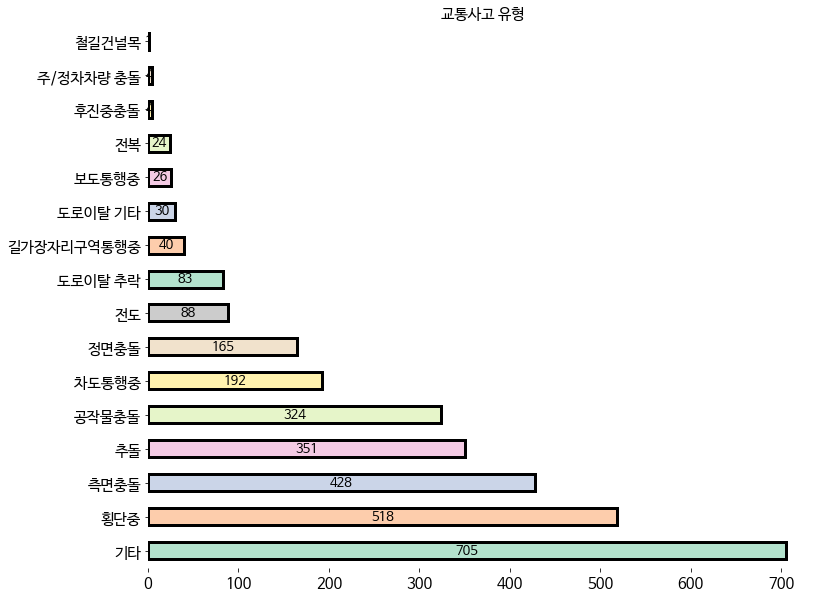

In [24]:
ax = df["사고유형"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                        , edgecolor="black", linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("교통사고 유형", fontsize=15)
plt.show()

#기타를 제외하면 횡단 중 사고가 가장 많음

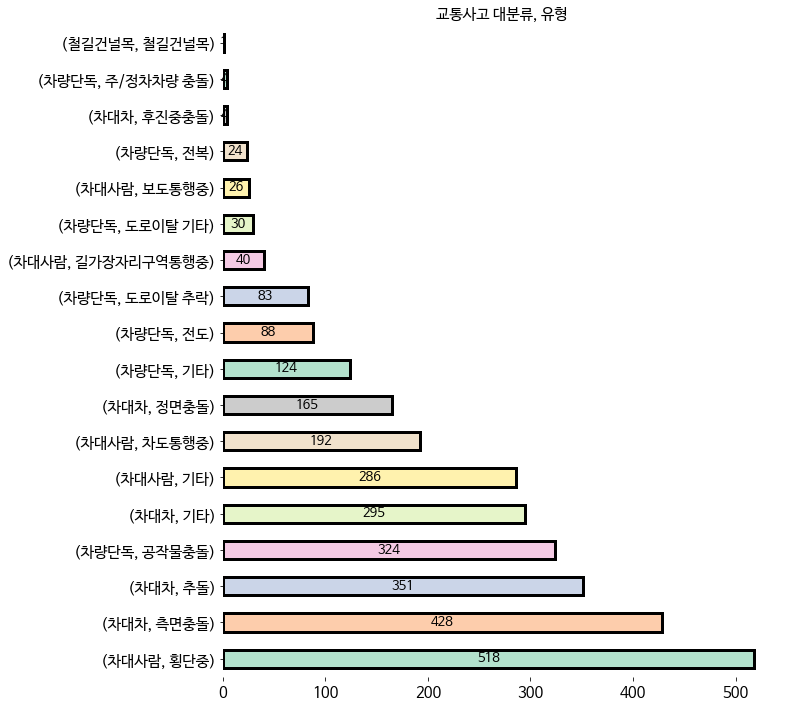

In [25]:
df_type = df[["사고유형_대분류", "사고유형"]]

df_type = df_type.value_counts().copy()

ax = df_type.plot.barh(figsize=(10, 12), fontsize=15, xlabel="", color=colors,
                  edgecolor="black", linewidth=3)
plt.box(False)
plt.title("교통사고 대분류, 유형", fontsize=15)

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)

#### 기타 데이터를 따로 채워볼까 싶었지만 경우의 수가 너무 많아서 넘겼습니다...

### 기타 데이터

In [26]:
df_gitar = df[["사고유형", "가해자법규위반"]]

In [27]:
df_gitar.value_counts()

사고유형        가해자법규위반    
기타          안전운전 의무 불이행    510
횡단중         안전운전 의무 불이행    314
공작물충돌       안전운전 의무 불이행    288
추돌          안전운전 의무 불이행    286
측면충돌        안전운전 의무 불이행    154
                          ... 
도로이탈 추락     중앙선 침범           1
            안전거리 미확보         1
            기타               1
길가장자리구역통행중  기타               1
후진중충돌       안전운전 의무 불이행      1
Length: 71, dtype: int64

In [28]:
df[df["가해자법규위반"] == "안전운전 의무 불이행"]

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
0,2020-01-01 05,야,수,1,0,0,0,서울,강남구,차대사람,차도통행중,안전운전 의무 불이행,승용차,보행자,127.046727,37.486761
1,2020-01-01 05,야,수,1,0,0,0,경기,화성시,차대차,추돌,안전운전 의무 불이행,승용차,화물차,126.950147,37.250560
2,2020-01-01 07,주,수,1,0,0,0,충남,천안시,차대사람,횡단중,안전운전 의무 불이행,승용차,보행자,127.137666,36.826933
3,2020-01-01 10,주,수,1,0,0,0,경남,거창군,차량단독,공작물충돌,안전운전 의무 불이행,화물차,없음,127.924796,35.736290
4,2020-01-01 11,주,수,1,0,0,0,경기,이천시,차량단독,도로이탈 추락,안전운전 의무 불이행,농기계,없음,127.626014,37.103415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,2020-12-30 08,주,수,1,0,0,0,전남,고흥군,차량단독,도로이탈 추락,안전운전 의무 불이행,승용차,없음,127.505944,34.454257
2974,2020-12-30 15,주,수,1,0,0,0,서울,중구,차량단독,기타,안전운전 의무 불이행,승합차,없음,126.981725,37.561812
2976,2020-12-31 06,주,목,1,0,0,0,경북,문경시,차량단독,도로이탈 추락,안전운전 의무 불이행,화물차,없음,128.311411,36.765482
2977,2020-12-31 07,주,목,1,1,0,1,경북,영천시,차대차,추돌,안전운전 의무 불이행,화물차,화물차,128.910048,35.902855


## 가해자와 피해자의 교통수단 그래프

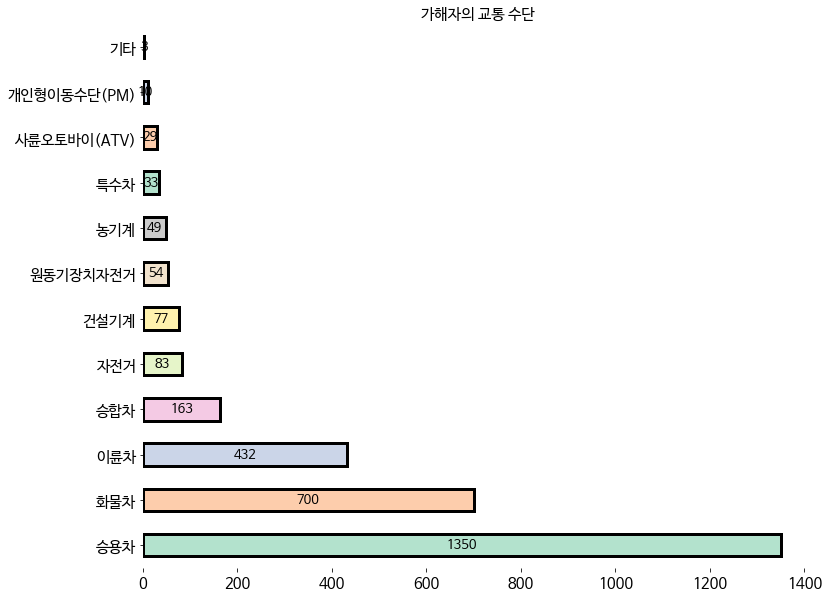

In [29]:
ax = df["가해자_당사자종별"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                            , edgecolor='black', linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("가해자의 교통 수단", fontsize=15)
plt.show()

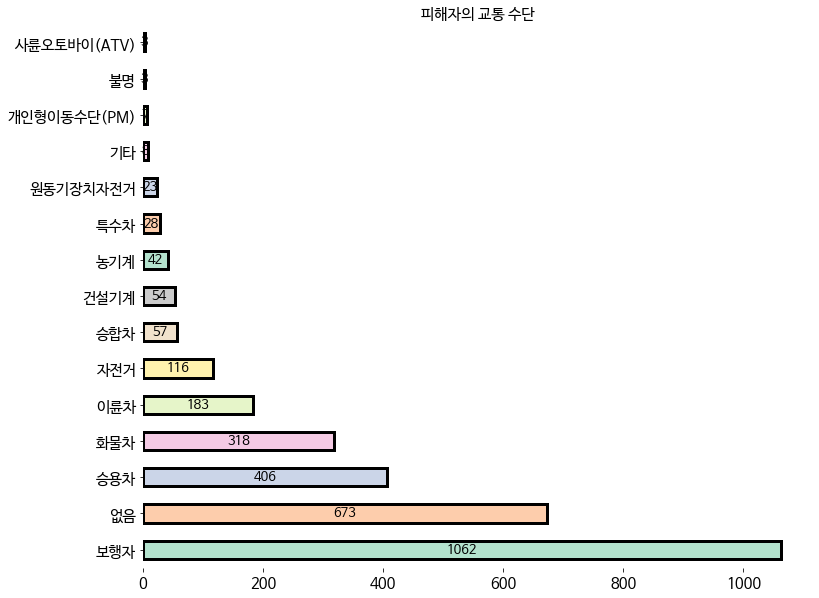

In [30]:
ax = df["피해자_당사자종별"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                             , edgecolor='black', linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("피해자의 교통 수단", fontsize=15)
plt.show()

#보행자가 가장 많고, 피해자 없음(추락, 장애물 충돌 등)이 두번째로 많음.

In [31]:
df_agre_vic = df[["가해자_당사자종별", "피해자_당사자종별"]]

df_agre_vic = df_agre_vic.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_agre_vic = df_agre_vic[df_agre_vic >= 20].copy()

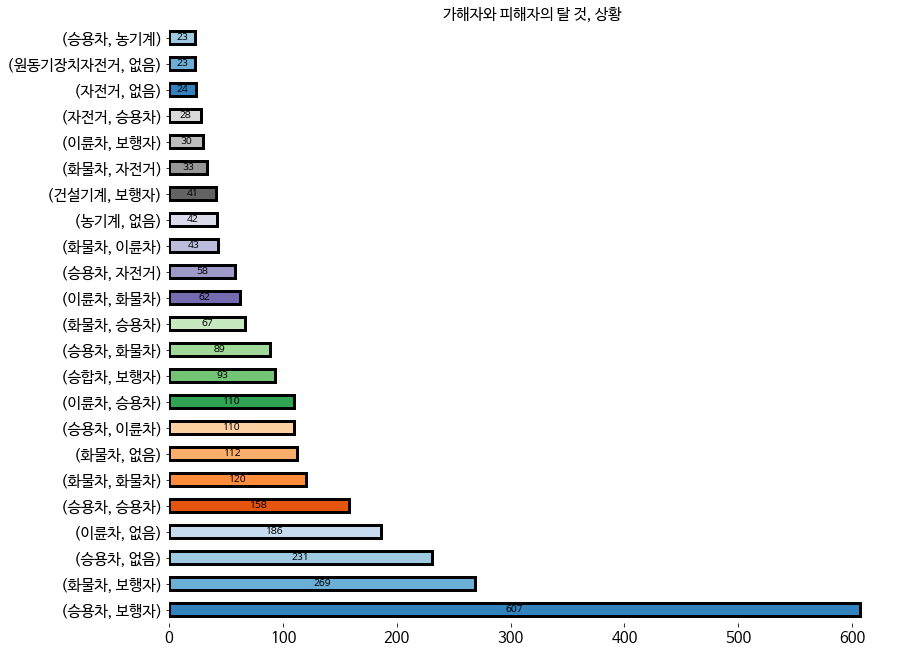

In [32]:
ax = df_agre_vic.plot.barh(figsize=(13, 11), xlabel='', fontsize=15, color=colors2,
                            linewidth=3, edgecolor="black")

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.title("가해자와 피해자의 탈 것, 상황", fontsize=15)
plt.box(False)
plt.show()

#가해자 - 승용차, 피해자 - 보행자 인 경우가 가장 많음.

## 가해자와 피해자의 교통수단, 사고 이유를 알아보기 위한 그래프

In [33]:
df_person = df[["가해자_당사자종별", "피해자_당사자종별", "가해자법규위반", "사고유형"]]

df_person = df_person.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_person = df_person[df_person >= 20].copy()

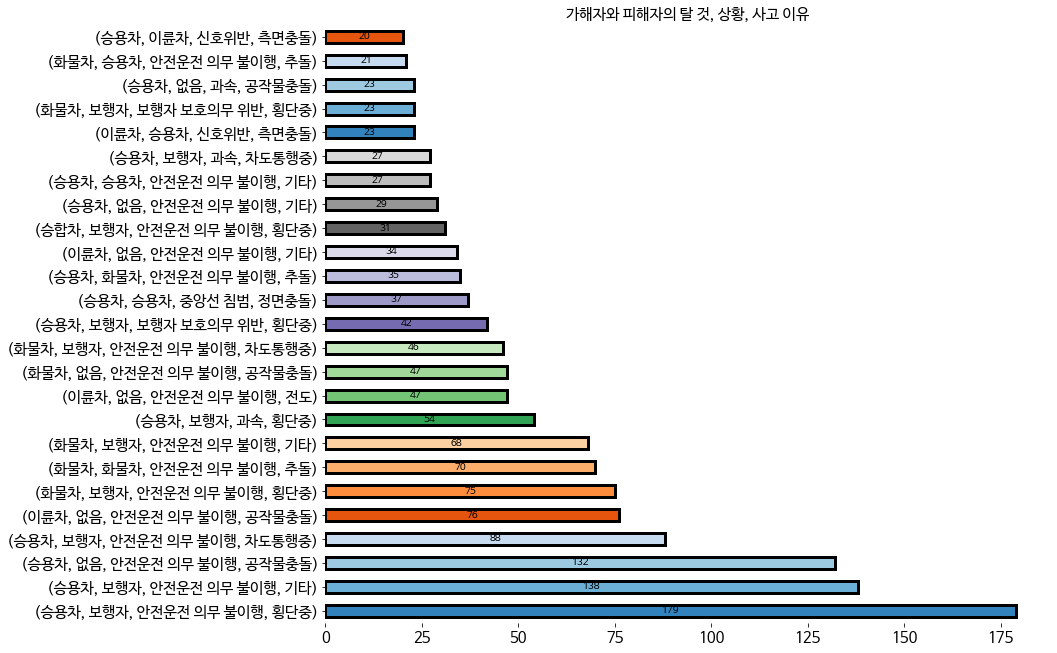

In [34]:
ax = df_person.plot.barh(figsize=(13, 11), xlabel='', fontsize=15, color=colors2,
                            linewidth=3, edgecolor="black")

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.title("가해자와 피해자의 탈 것, 상황, 사고 이유", fontsize=15)
plt.box(False)
plt.show()

#가해자 - 승용차, 피해자 - 보행자, 안전운전 의무 불이행, 횡단 중 일어난 사고가 가장 많음.

## Folium으로 지도 시각화

In [35]:
lat = df["위도"].mean()
long = df["경도"].mean()

In [36]:
df["위도"].mean()

36.3446901964835

In [37]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=7,
              )
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    
        sub_lat = df.loc[i, "위도"]
        sub_long = df.loc[i, "경도"]
        title = df.loc[i, "발생지시도"] + " - " + df.loc[i, "발생지시군구"]
        
        icon_color = "blue"
        
        folium.Marker(
            [sub_lat, sub_long],
            icon=folium.Icon(color=icon_color) ,
            popup="<i>(title)</i>",
            tooltip=title).add_to(marker_cluster)

m.save("index.html")
m

Output hidden; open in https://colab.research.google.com to view.

### 위 지도에서 볼 수 있는 지역별 사고 횟수를 그래프로 표시

Text(0.5, 1.0, '시도별 교통사고 발생 빈도')

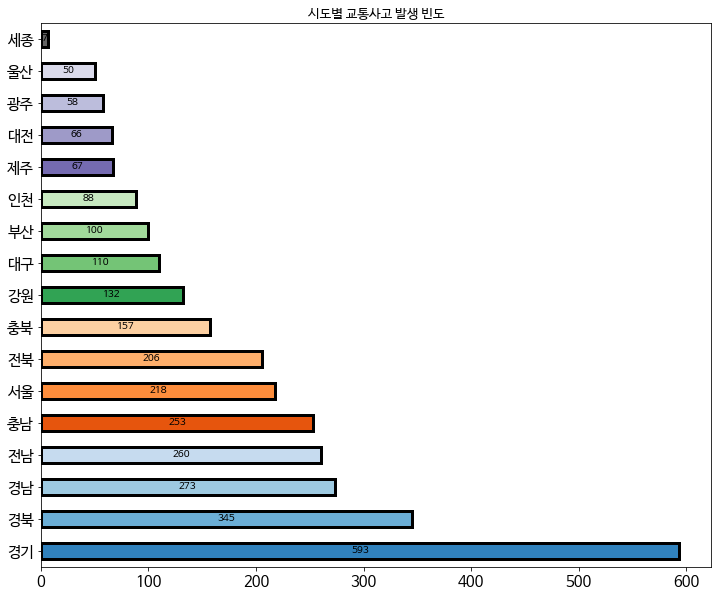

In [38]:
ax = df["발생지시도"].value_counts().plot.barh(color=colors2, figsize=(12, 10), fontsize=15,
                                    linewidth=3, edgecolor='black')

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
plt.title("시도별 교통사고 발생 빈도", fontsize=13)    

#경기도에서 가장 많은 사고가 일어남

In [39]:
df_city = df[["발생지시도", "발생지시군구"]]

df_city = df_city.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_city = df_city[df_city >= 20].copy()

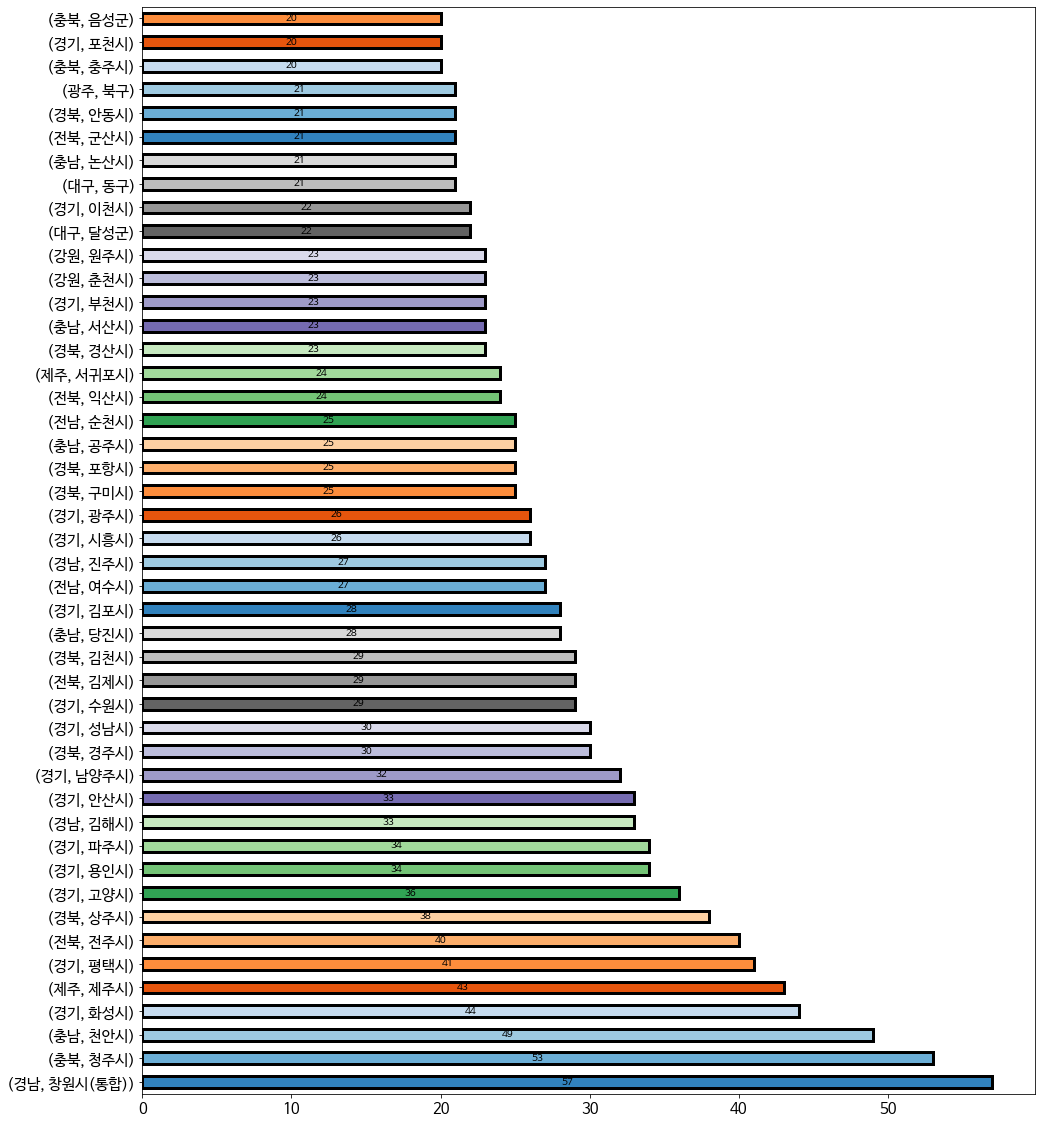

In [40]:
ax = df_city.plot.barh(color=colors2, figsize=(16, 20), fontsize=15,
                                    linewidth=3, edgecolor='black', xlabel="")
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
    
#경남 - 창원시에서 가장 많은 사고가 일어남.